<a href="https://colab.research.google.com/github/violet417/violet417/blob/main/1%EA%B8%B0%EC%B4%88_39_%EC%88%98%EC%A7%91%ED%95%9C_%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC%EB%A1%9C_%EB%B9%88%EB%8F%84%EB%B6%84%EC%84%9D%ED%95%98%EA%B3%A0_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 빈도분석  
- 문장이나 대화 속에서 각각의 문자의 빈출 경향의 정도를 분석

In [ ]:
# 빈도 분석 알고리즘
words = ['한국', '한국', '일본', '중국']

for i in words:
    print(i)

한국
한국
일본
중국


In [ ]:
words = ['한국', '한국', '일본', '중국']
dic = {}
for i in words:
    if i in dic:          # i가 dic에 있으면, 
        dic[i] += 1       # dic[key값] value값에 1을 더함.  
    else:
        dic[i] = 1        # 없으면, dic[key값] value값 1을 넣음.  
dic

{'한국': 2, '일본': 1, '중국': 1}

In [ ]:
# 워드클라우드 그리기
form wordcloud import WordCloud

wc = WordCloud(font_path='폰트이름', background_color = '...', mask = '...')
wc.generate_from_frequencies(dic)

In [ ]:
# 한글 폰트 가져오기 // colab에는 한글지원 x, 그림 그릴때 한글이 깨져 보일 수 있으므로.

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import time
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image    # 이미지 데이터 불러오고 처리하는 라이브러리

In [ ]:
from tqdm import tqdm    # for문이 언제 끝나는지 알려주는 라이브러리
total = []

for n in tqdm(range(1, 3992, 10)):   # 400개

    url = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%ED%95%9C%EA%B5%AD&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=60&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}".format(n))
    html = BeautifulSoup(url.text)

    news = html.find('ul', class_ = 'list_news').find_all('li', class_ = 'bx')

    for i in news: 
        title = i.find('a', class_ = "news_tit").text
        content = i.find('a', class_ = "api_txt_lines dsc_txt_wrap").text

        total.append([title, content])

time.sleep(1)    # 한번 돌아갈 때마다 1초씩 쉬기

100%|██████████| 400/400 [06:52<00:00,  1.03s/it]


In [ ]:
df = pd.DataFrame(total, columns = ['제목', '요약'])    # 데이터프레임 만들기
df

,제목,요약
0,내년 한국 경제성장률 1%대...국내 연구소도 우울한 전망,고물가·고환율·고금리로 내년 한국 경제성장률이 1%대 후반으로 둔화할 것이란 전망이...
1,한국정책방송원장에 동아일보 출신 하종대씨,문화체육관광부는 18일 한국정책방송원 원장에 하종대(57) 씨를 임명했다고 밝혔다....
2,히잡 안썼다는 이유로?…한국왔던 이란 女 클라이밍 선수 실종,히잡을 착용하지 않고 한국에서 열린 국제대회에 출전한 이란의 스포츠클라이밍 선수 엘...
3,[단독] 전기 많이 먹는다고…한국산 8K TV 유럽서 판매중단 위기,"EU, 내년 3월부터 친환경 규제 강화 '수입장벽' 삼성·LG 제품 기준미달 프리미..."
4,"美 냉동공조설비 인증, 이제 한국서 받는다…시간·비용 절감",기사내용 요약 인천 한국공기과학시험연구원 개원 AHRI 한국시험소…아시아 두 번째 ...
...,...,...
3995,[외로움 전성시대] ① 모두가 외로운 사회…한국인의 외로움 지수는?,1인 가구 유튜버에 공감을 느끼고 이들을 소비하는 수많은 한국인들. 이런 한국인은 ...
3996,尹 지지율 1%p 하락한 28%...40대선 부정 평가 82% [한국갤럽],여론조사기관 한국갤럽이 지난 11~13일 전국 만 18세 이상 1002명에게 윤 대...
3997,[한국갤럽] 여성가족부 폐지 ‘좋게 본다42% vs 좋지 않게 본다38%’,한국갤럽은 윤석열 정부가 제출한 여성가족부 폐지에 대한 국민 의견을 조사한 결과 여...
3998,"인텔리빅스, '한국건설안전박람회'서 비전 AI 기술 선봬",인텔리빅스(대표 장정훈)는 오는 19일부터 21일까지 일산 킨텍스에서 개최되는 '...


In [ ]:
import re    # 빈도분석

text = ''    # 빈 문자열 만들기

for i in total:
    text += i[0]    # i의 0번째는 제목 / text에다가 i[0]째는 더하기
    text += '\n'    # 엔터키
    text += i[1]    # i의 1번째는 내용 / 다시 text에다가 i[1]째는 더하기
    text += '\n'    # 엔터키  --> 엄청난 양의 텍스트를 마치 한문장처럼 만들어 저장

len(text)

616551

In [ ]:
box = re.findall("[가-힣]{2,}", text)   # 한글 가부터 힣까지 글자가 2개 이상인 단어만 추출
len(box)

111306

In [ ]:
dic = {}

for i in box:
    if i in dic:
        dic[i] += 1
    else:
        dic[i] = 1

dic

{'내년': 85,
 '한국': 2158,
 '경제성장률': 10,
 '국내': 267,
 '연구소도': 1,
 '우울한': 1,
 '전망': 24,
 '고물가': 3,
 '고환율': 3,
 '고금리로': 1,
 '경제성장률이': 1,
 '후반으로': 1,
 '둔화할': 1,
 '것이란': 7,
 '전망이': 9,
 '나왔다': 24,
 '하나은행': 10,
 '글로벌': 116,
 '신용평가사': 5,
 '피치가': 1,
 '전망치를': 3,
 '내놓은': 1,
 '이후': 101,
 '연구기관': 1,
 '중에': 4,
 '한국정책방송원장에': 12,
 '동아일보': 16,
 '출신': 17,
 '하종대씨': 6,
 '문화체육관광부는': 8,
 '한국정책방송원': 12,
 '원장에': 13,
 '하종대': 26,
 '씨를': 13,
 '임명했다고': 17,
 '밝혔다': 568,
 '임기는': 10,
 '월부터': 30,
 '년이다': 8,
 '한국정책방송원은': 5,
 '책임운영기관의': 4,
 '설치': 10,
 '운영에': 5,
 '관한': 23,
 '법률': 5,
 '따라': 58,
 '기관장에게': 3,
 '행정': 3,
 '재정상': 2,
 '자율성을': 2,
 '히잡': 6,
 '안썼다는': 1,
 '이유로': 5,
 '한국왔던': 1,
 '이란': 31,
 '클라이밍': 5,
 '선수': 35,
 '실종': 4,
 '히잡을': 4,
 '착용하지': 2,
 '않고': 9,
 '한국에서': 105,
 '열린': 516,
 '국제대회에': 1,
 '출전한': 18,
 '이란의': 2,
 '스포츠클라이밍': 14,
 '엘나즈': 2,
 '레카비가': 2,
 '매체는': 1,
 '스포츠클라이밍팀이': 2,
 '묵고': 2,
 '있던': 9,
 '서울의': 3,
 '호텔에': 2,
 '연락했으나': 2,
 '팀원들이': 2,
 '한국시각': 6,
 '월요일': 1,
 '오전': 169,
 '단독': 27,
 '전기': 98,
 '많이': 42,
 '먹는

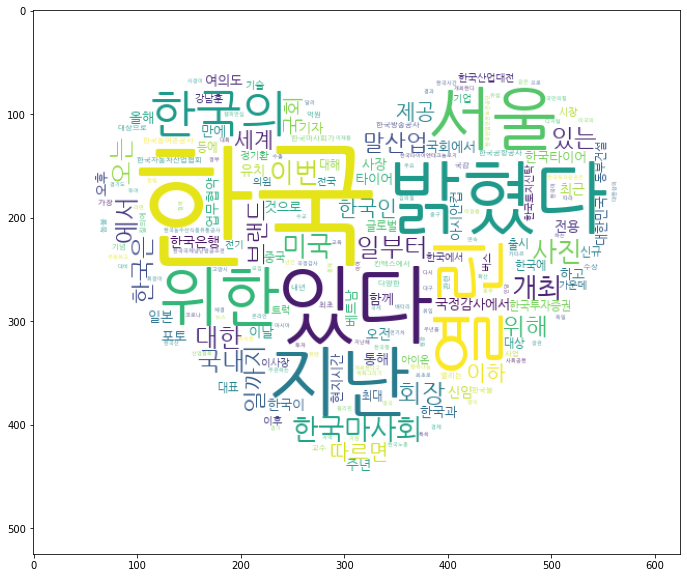

In [ ]:
wc = WordCloud(font_path = 'NanumGothic.ttf',
               background_color = 'white', mask = img)

plt.figure(figsize = (20,10))
cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)

In [ ]:
img = Image.open("하트4.png")    # 흰색에 가까울수록 255, 0에 가까울수록 검은색
img = np.array(img)
img

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255